<a href="https://colab.research.google.com/github/miglesky/CNN-Computer-Vision-for-Uni-educational-purpose-/blob/main/CNN_Deep_Computer_Vision_Second_Part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 2s 0us/step


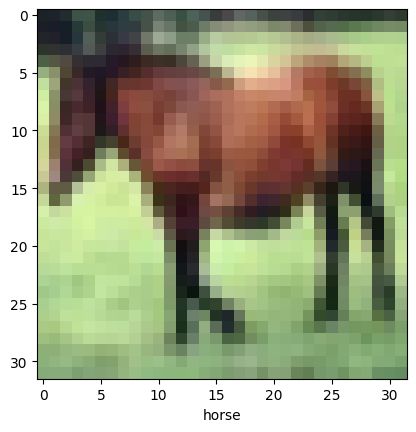

In [ ]:
IMG_INDEX = 7

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()  # let's have a look at our model so far

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
model.compile(optimizer='adam',
              #loss='sparse_categorical_crossentropy',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.4798 - accuracy: 0.4630 - val_loss: 1.2565 - val_accuracy: 0.5504
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1652 - accuracy: 0.5890 - val_loss: 1.1213 - val_accuracy: 0.6014
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.0139 - accuracy: 0.6429 - val_loss: 1.0061 - val_accuracy: 0.6455
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9195 - accuracy: 0.6754 - val_loss: 0.9919 - val_accuracy: 0.6527
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8424 - accuracy: 0.7061 - val_loss: 0.9377 - val_accuracy: 0.6813
Epoch 6/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7914 - accuracy: 0.7250 - val_loss: 0.8811 - val_accuracy: 0.6919
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7383 - accuracy: 0.7417 - val_loss: 0.8899 -

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 5s - loss: 0.8976 - accuracy: 0.7046 - 5s/epoch - 14ms/step
0.7045999765396118


In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 4s 11ms/step


In [ ]:
print(predictions[2])

[ 3.057294   4.096286  -4.436991  -1.7601174 -3.6934817 -3.63948
 -5.3074136 -2.750415   4.7585025  1.5172267]


In [ ]:
import numpy as np

In [ ]:
np.argmax(predictions[2])

8

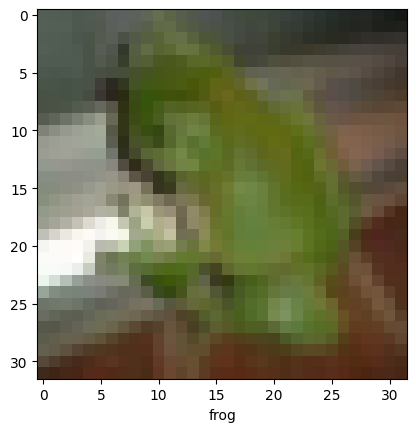

In [ ]:
IMG_INDEX = 7  # change this to look at other images

plt.imshow(test_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[test_labels[IMG_INDEX][0]])
plt.show()

##Working with Small Datasets
In the situation where you don't have millions of images it is difficult to train a CNN from scratch that performs very well. This is why we will learn about a few techniques we can use to train CNN's on small datasets of just a few thousand images.

###Data Augmentation
To avoid overfitting and create a larger dataset from a smaller one we can use a technique called data augmentation. This is simply performing random transofrmations on our images so that our model can generalize better. These transformations can be things like compressions, rotations, stretches and even color changes.

Fortunately, keras can help us do this. Look at the code below to an example of data augmentation.



In [ ]:
!pip install keras

In [ ]:
from keras.preprocessing import image #importing
from keras.preprocessing.image import ImageDataGenerator

# creates a data generator object that transforms images
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')
# if you wnat to see more posible transformations check docs:
#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator


# pick an image to transform this could be any image
test_img = train_images[69]
img = image.img_to_array(test_img)  # convert image from a little unorthodox type to numpy arry
img = img.reshape((1,) + img.shape)  # reshape image where the new shape will be 1 and image shape

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4:  # show 4 images
        break

plt.show()


ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (/usr/local/lib/python3.10/dist-packages/keras/api/preprocessing/image/__init__.py)

###Pretrained Models
You would have noticed that the model above takes a few minutes to train in the NoteBook and only gives an accuaracy of ~70%. This is okay but surely there is a way to improve on this.


In this section, we'll discuss how incorporating a pretrained convolutional neural network (CNN) into our custom network can enhance our model's accuracy. Typically, CNNs by themselves, without dense layers, simply identify feature presence in the input. By leveraging a CNN that has been pretrained on millions of images, we create a robust convolutional foundation for our model. We then add our own dense layers to build a classifier. This approach allows us to develop a highly effective classifier even with a relatively small dataset (fewer than 10,000 images). This effectiveness stems from the pretrained CNN's ability to accurately and efficiently recognize important features in images. Once the feature presence is established, the only task remaining is for the model to learn which feature combinations are unique to specific images.


###Fine Tuning

When using the technique described earlier, we typically focus on modifying the last few layers of our convolutional base to better suit our specific problem. This means we leave the initial layers untouched, without retraining them, because they are highly effective at capturing basic visual elements such as lines and edges, which are common across different types of images. The later layers, however, are more adept at identifying distinct features like shapes or even eyes. By fine-tuning these final layers, we tailor the model to recognize features that are particularly relevant to our unique problem. This targeted adjustment helps enhance the model’s performance on tasks specific to our needs.

##Using a Pretrained Model

In this section, we'll apply the techniques we've previously covered by utilizing a pre-trained model, which we will fine-tune to differentiate between images of dogs and cats. We'll achieve this using a relatively small dataset.

In [ ]:
#Import numpy, pyplot, tensorflow
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

###Dataset
We will load the *cats_vs_dogs* dataset from the modoule tensorflow_datatsets.
If you want to see what additional data sets you can use [CLICK HERE](https://knowyourdata-tfds.withgoogle.com/)


**cats_vs_dogs** dataset contains (image, label) pairs where images have different dimensions and 3 color channels.



In [ ]:
import tensorflow_datasets as tfds
#tfds.disable_progress_bar() use this if you dont want to see progress bar

# split the data manually into 80% training, 10% testing, 10% validation
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],#from train data we slpit up from 0 to 80 for training
    #80 to 90  for testing
    #from 90 to 100 for validation
    with_info=True,
    as_supervised=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.6Q0FVQ_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


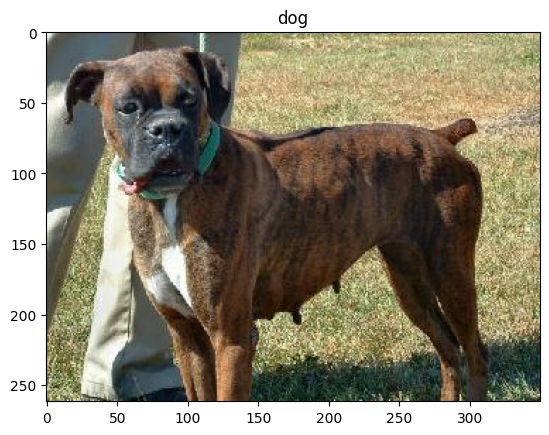

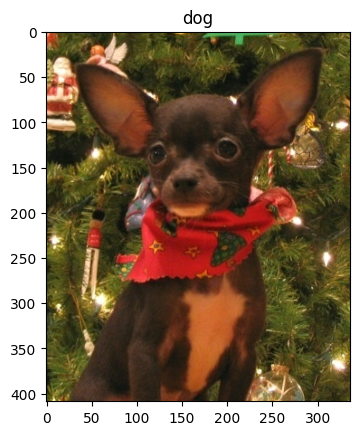

In [ ]:
get_label_name = metadata.features['label'].int2str  # creates a function object that we can use to get labels

# display 2 images from the dataset
for image, label in raw_train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

###Data Preprocessing
Since the sizes of our images have different dimensiosns, we need to convert them all to the same size. We can create a function that will do that for us below.



In [ ]:
IMG_SIZE = 160 # All images will be resized to 160x160
#make sure you are choosing the size based in most of youor images so you would not streach and loose details
#smaller is typically better in my experience

def format_example(image, label):
  image = tf.cast(image, tf.float32)# cast --> converts every pixel value to float32 value
  image = (image/127.5)-0.35 #deviding by half of 255 and substracting 1 to make colours less promenint feature
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))#resise to new shape of 160
  return image, label #returns an image that is reshaped to IMG_SIZE

Now we can apply this function to all our images using ```.map()```.
 ```.map()``` takes every single image in the dataset and applies function to it

In [ ]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

Let's have a look at our images now.

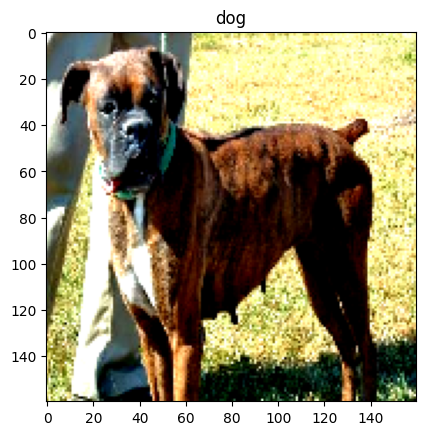

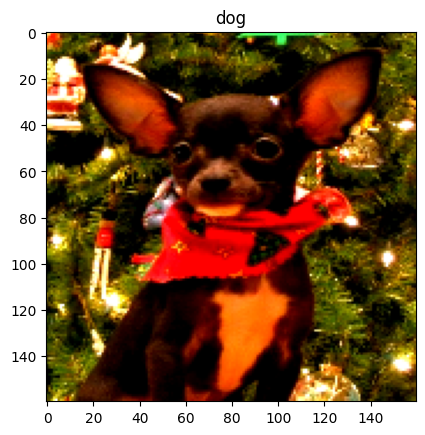

In [ ]:
for image, label in train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

In [ ]:
#lets compare the size of the images:
for img, label in raw_train.take(2):
  print("Original size: ", img.shape)
for img, label in train.take(2):
  print("New size: ", img.shape)


Original size:  (262, 350, 3)
Original size:  (409, 336, 3)
New size:  (160, 160, 3)
New size:  (160, 160, 3)


Finally we will shuffle and batch the images.

In [ ]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

###Picking a Pretrained Model
The model we are going to use as the convolutional base for our model is the [**MobileNet V2**](https://www.tensorflow.org/api_docs/python/tf/keras/applications/MobileNetV2) developed at Google. This model is trained on 1.4 million images and has 1000 different classes.

We want to use this model but only its convolutional base. So, when we load in the model, we'll *specify that we don't want to load the top (classification) layer*. We'll tell the model what input shape to expect and to use the predetermined weights from *imagenet* (Googles dataset).



In [ ]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,#very importatn to define input shape cause it could take any
                                               include_top=False,#so top clasification layer would not be included
                                               weights='imagenet')

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[

It is importat to check what kind of shape we get from using this model in this case:
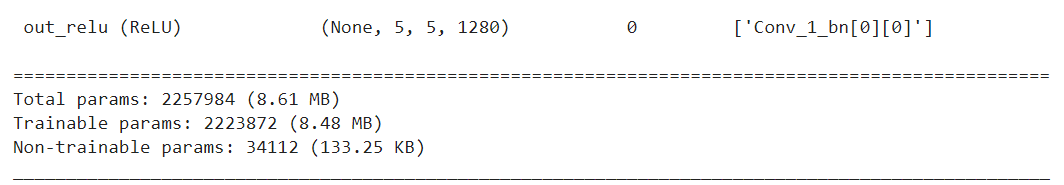

At this point this *base_model* will simply output a shape (32, 5, 5, 1280) tensor that is a feature extraction from our original (1, 160, 160, 3) image. The 32 means that we have 32 layers of differnt filters/features.

In [ ]:
for image, _ in train_batches.take(1):
   pass

feature_batch = base_model(image)
print(feature_batch.shape)

(32, 5, 5, 1280)


###Freezing the Base
The term **freezing** refers to disabling the training property of a layer. It simply means we won’t make any changes to the weights of any layers that are frozen during training. This is important as we don't want to change the convolutional base that already has learned weights.



In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_160"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 160, 160, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 80, 80, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 80, 80, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 80, 80, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 80, 80, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 80, 80, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 80, 80, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 80, 80, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 80, 80, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 80, 80, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 80, 80, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 80, 80, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 81, 81, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 40, 40, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

###Adding our Classifier
Now that we have our base layer setup, we can add the classifier. Instead of flattening the feature map of the base layer we will use a global average pooling layer that will average the entire 5x5 area of each 2D feature map and return to us a single 1280 element vector per filter.  



In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()#takes entire average and and make it into a tensor -- in a way we could say we are flattining it

Finally, we will add the predicition layer that will be a single dense neuron. We can do this because we only have two classes to predict for.




In [ ]:
prediction_layer = keras.layers.Dense(1)

Now we will combine these layers together in a model.

In [ ]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [ ]:
model.summary()

###Training the Model
Now we will train and compile the model. We will use a very small learning rate to ensure that the model does not have any major changes made to it.

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# We can evaluate the model right now before training it on our new images to see how it does:
initial_epochs = 3
validation_steps=20

loss0,accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

20/20 [==============================] - 58s 603ms/step - loss: 0.6275 - accuracy: 0.6687


In [ ]:
# Now we can train it on our images
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches)

acc = history.history['accuracy']
print(acc)

Epoch 1/3
582/582 [==============================] - 380s 644ms/step - loss: 0.0748 - accuracy: 0.9710 - val_loss: 0.0536 - val_accuracy: 0.9789
Epoch 2/3
582/582 [==============================] - 408s 699ms/step - loss: 0.0494 - accuracy: 0.9816 - val_loss: 0.0511 - val_accuracy: 0.9807
Epoch 3/3
582/582 [==============================] - 409s 701ms/step - loss: 0.0446 - accuracy: 0.9832 - val_loss: 0.0515 - val_accuracy: 0.9811
[0.9710370898246765, 0.9815690517425537, 0.9832348227500916]


In [ ]:
model.save("dogs_vs_cats.h5")  # we can save the model and reload it at anytime in the future
new_model = tf.keras.models.load_model('dogs_vs_cats.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Write a scirpt to predict if its a cat or not:

In [ ]:
img.shape

In [ ]:
predictions = model.predict(test_batches)

73/73 [==============================] - 52s 695ms/step


In [ ]:
predictions = model.predict(test_batches)

73/73 [==============================] - 42s 577ms/step


##Object Detection
If you'd like to learn how you can perform object detection and recognition with tensorflow check out the guide below.

https://github.com/tensorflow/models/tree/master/research/object_detection